In [3]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

#  Keras 提供的數據庫
from keras.datasets import mnist

# 互動設計用
from ipywidgets import interact_manual

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train), len(y_train), len(x_test), len(x_test)

(60000, 60000, 10000, 10000)

In [6]:
y_train[0]

5

In [6]:
x_train[0] # python 習慣將每一筆資料在用 [] 包起來 ex:  [[1], [2], [3], [4], [5]] 其實是 5 比資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

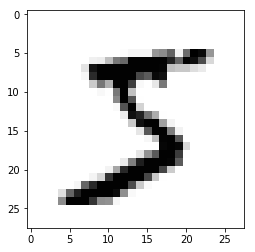

In [7]:
plt.imshow(x_train[0], cmap="Greys") # color map 設定為灰階

In [8]:
y_train[0]

5

In [9]:
x_train = x_train / 255 # 將所有矩陣中的數值變成 0 ~ 1 之間
x_test = x_test / 255
# x_train = x_train.reshape(60000, 784) / 255 手動更改形狀，如此不需使用 Flatten
# x_test = x_test.reshape(10000, 784) / 255

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y_train, 10) # 執行 onehot encoding 
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten # Flattn 是將 2 維或是多維的數據拉平
from keras.optimizers import SGD # 每一次訓練的時候輸入的順序是隨機的

In [14]:
model = Sequential()

In [15]:
Flatten(input_shape = (28, 28))

In [16]:
model.add(Flatten(input_shape = (28,28))) # 輸入曾將資料拉平

In [17]:
model.add(Dense(10, activation="relu")) # 第一層用 10 個神經元

In [18]:
model.add(Dense(15, activation="relu")) # 第二層用 15 個神經元

In [19]:
model.add(Dense(15, activation="relu")) # 第三層用 15 個神經元

In [20]:
model.add(Dense(10, activation="softmax")) # 輸出層用 10 個神經元   softmax 可以讓所有的輸出加起來為 1

### loss function 挑選 mse
### lr 為 learning rate
### accuracy 為每一個步驟顯示準確率

In [21]:
model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])

In [22]:
model.summary() # 參數需要加上 bias 才會準確

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 8,415
Trainable params: 8,415
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, batch_size=60, epochs=20) # batch size 每幾個對一次答案，調整參數  epochs 總共要訓練的次數

Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0283 - accuracy: 0.7936
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0137 - accuracy: 0.9111
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0122 - accuracy: 0.9203
Epoch 4/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.0113 - accuracy: 0.9266
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0107 - accuracy: 0.9321
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0102 - accuracy: 0.9347
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0098 - accuracy: 0.9372
Epoch 8/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0095 - accuracy: 0.9393
Epoch 9/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0092 - accuracy: 0.9411
Epoch 10/20
60000/60000 [==============================

In [24]:
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
def test(input_number):
    plt.imshow(x_test[input_number], cmap='Greys')
    print('神經網路判斷為:', model.predict_classes(x_test)[input_number])

神經網路判斷為: 2


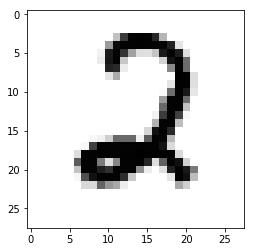

In [26]:
test(2904)

In [27]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/step


In [28]:
print("loss : {}, accuracy : {}".format(score[0], score[1]))

loss : 0.009177466782728062, accuracy : 0.9402999877929688
